In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import numpy as np

In [3]:
import surp
import arya

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [4]:
from scipy.integrate import quad

In [5]:
A21 = 0
t1 = 4
twoexp_1 = surp.simulation.sfh_models.twoexp(t1=t1, A21=A21)
quad(twoexp_1, 0, 13.2)

(1.0000000000000004, 1.110223024625157e-14)

In [6]:
A21 = 5
t1 = 4
twoexp = surp.simulation.sfh_models.twoexp(t1=t1, A21=A21, tau2=0.5)
quad(twoexp, t1, 13.2)[0] - quad(twoexp_1, t1, 13.2)[0]

4.999999999999998

In [7]:
t = np.linspace(0, 13.2, 1000)

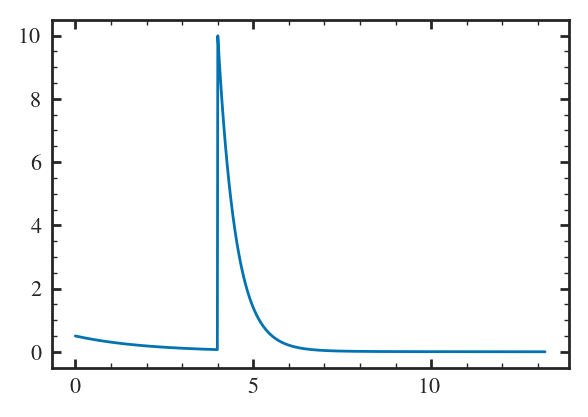

In [8]:
plt.plot(t, twoexp(t))

In [9]:
quad(twoexp, 0, 4)

(0.8658425813365855, 9.612783695007571e-15)

In [10]:
quad(twoexp, 4, 13.2)

(5.1341574186634125, 5.700059778851143e-14)

In [11]:
params = surp.simulation.parameters.MWParams.from_file("../../models/C11_f0.2_twoinfall/params.json")

In [12]:
model  = surp.simulation.create_model(params)

t_T = 3.7
At/AT = 0.4461054142807123
r = 0.05
A21 = 2.063237541048294
tau2 = 2.8576750000000004

t_T = 3.7
At/AT = 0.4505888482313854
r = 0.15000000000000002
A21 = 2.083973423070158
tau2 = 2.8613250000000003

t_T = 3.7
At/AT = 0.4551173414423738
r = 0.25
A21 = 2.1049177041709792
tau2 = 2.8649750000000003

t_T = 3.7
At/AT = 0.4596913467667718
r = 0.35000000000000003
A21 = 2.12607247879632
tau2 = 2.868625

t_T = 3.7
At/AT = 0.4643113216089242
r = 0.45
A21 = 2.1474398624412747
tau2 = 2.872275

t_T = 3.7
At/AT = 0.46897772797016485
r = 0.55
A21 = 2.169021991862013
tau2 = 2.87919

t_T = 3.7
At/AT = 0.4736910324950186
r = 0.6500000000000001
A21 = 2.190821025289461
tau2 = 2.88937

t_T = 3.7
At/AT = 0.47845170651786545
r = 0.75
A21 = 2.212839142645128
tau2 = 2.8995499999999996

t_T = 3.7
At/AT = 0.48326022611007546
r = 0.8500000000000001
A21 = 2.2350785457590994
tau2 = 2.9097299999999997

t_T = 3.7
At/AT = 0.48811707212761446
r = 0.95
A21 = 2.257541458590217
tau2 = 2.91991

t_T = 3.7
At/AT = 0

/users/PAS2232/aeyobd/VICE/vice/core/singlezone/singlezone.py:842: ScienceWarning: Closed-box GCE models have been shown to overpredict the metallicities of solar neighborhood stars. This was known as the G-dwarf problem (Tinsley 1980, Fundamentals of Cosmic Phys., 5, 287). Outflows have been shown to be necessary for maintaining long-term chemical equilibrium (Dalcanton 2007, ApJ, 658, 941).
  self.__c_version.eta = value


# loading model

In [13]:
fiducial = surp.ViceModel.from_file("../../models/C11_f0.2_twoinfall/model.json")

In [14]:
R_MAX = 15.5
h = fiducial.history[fiducial.history.R < R_MAX]

In [15]:
t_end = np.max(h.time)

In [16]:
filt = h.time == t_end
h_end = h[filt]

# Star Formation History
Should go as the two part power law

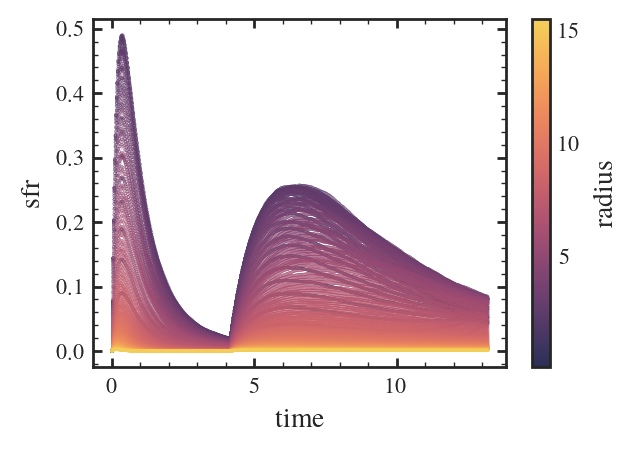

In [17]:
plt.scatter(h.time, h.sfr, c=h.R, s=0.01)
plt.xlabel("time")
plt.ylabel("sfr")
plt.colorbar(label="radius")

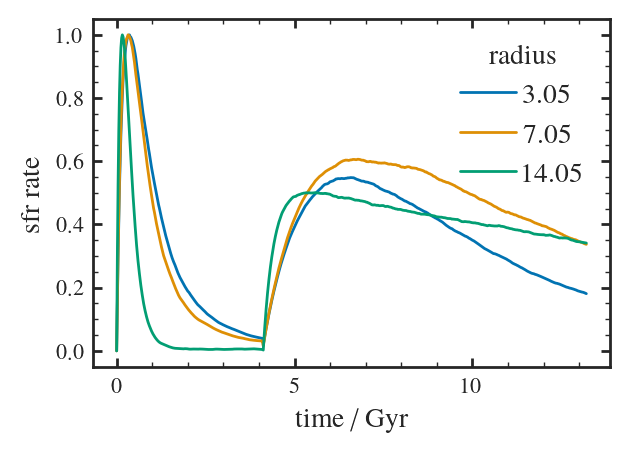

In [41]:
for R, tau_sfh in [(3.05, 7.5), (7.05, 14), (14.05, 35)]:
    tau_rise = 2
    filt = np.isclose(h.R, R)
    h1 = h[filt]
    plt.plot(h1.time, h1.sfr / np.max(h1.sfr), label=R)
    
plt.xlabel("time / Gyr")
plt.ylabel("peak-normalized sfr rate")
plt.legend(title="radius")

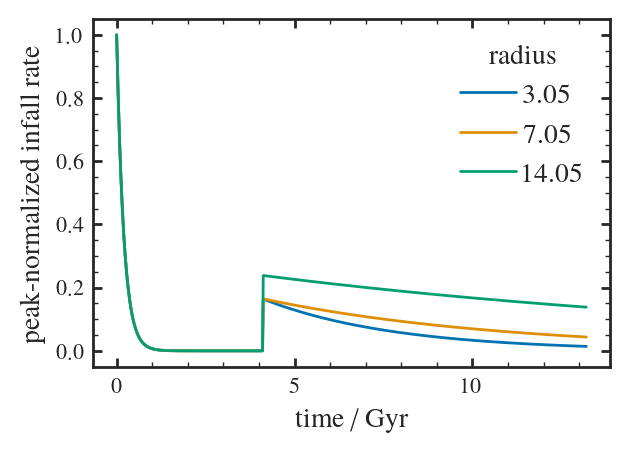

In [43]:
for R, tau_sfh in [(3.05, 7.5), (7.05, 14), (14.05, 35)]:
    tau_rise = 2
    filt = np.isclose(h.R, R)
    h1 = h[filt]
    plt.plot(h1.time, h1.ifr / np.max(h1.ifr), label=R)
plt.xlabel("time / Gyr")
plt.ylabel("peak-normalized infall rate")
plt.legend(title="radius")

Text(0.5, 0, 'radius / kpc')

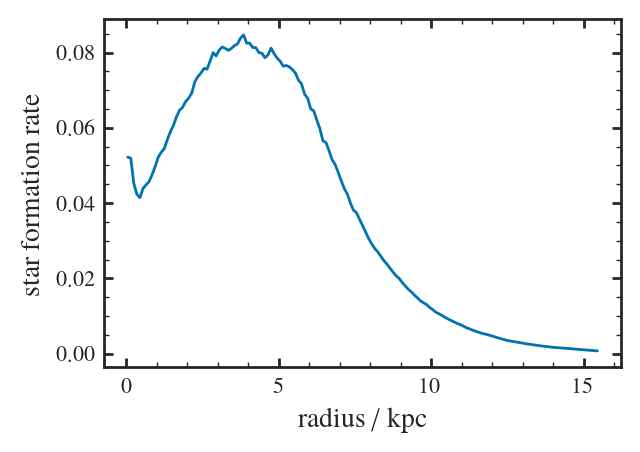

In [44]:
plt.plot(h_end.R, h_end.sfr)
plt.ylabel("star formation rate ")
plt.xlabel("radius / kpc")

In [45]:
dR = h_end.R[1] - h_end.R[0]

/tmp/slurmtmp.28555229/ipykernel_100978/243264679.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dR = h_end.R[1] - h_end.R[0]


Text(0.5, 0, 'R')

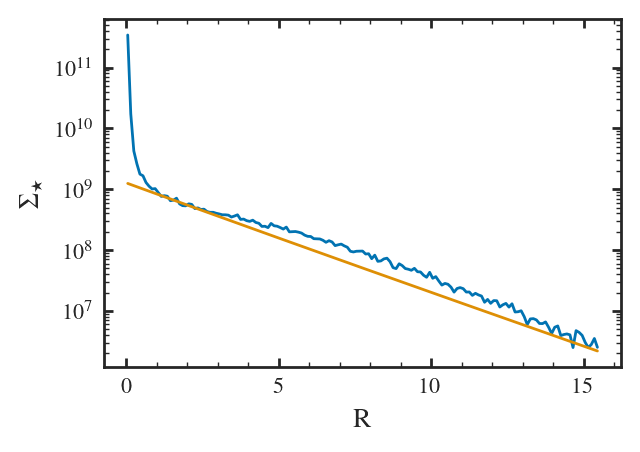

In [23]:
A = (2*np.pi * h_end.R * dR).values
plt.plot(h_end.R, h_end.mstar / A)
#plt.plot(h_end.R, h_end.mgas / A)

plt.yscale("log")
#plt.xscale("log")
plt.plot(h_end.R, 1e9*(np.exp(-h_end.R / 2.5) + 0.27*np.exp(-h_end.R / 2.0)))
plt.ylabel(r"$\Sigma_\star$")
plt.xlabel("R")


star formation densities are okay. divergence at centre is likely a result of migration but may not even be that unphysical.

# SFR Law

In [24]:
def KS_law(Σg):
    # sfr density as a function of gas mass
    Σ1 = 2e7
    Σ2 = 5e6
    γ1 = 1
    γ2 = 3.6
    γ3 = 1.7
    
    C1 = Σ2**(γ3 - γ2) * Σ1**(γ2 - γ1)
    C2 = Σ2**(γ3 - γ2)
    norm = 1/2.1 / C1

    s = 0
    s += np.where(Σ1 < Σgas , C1 * Σgas ** γ1, 0)
    s += np.where((Σ2 < Σgas) & (Σgas <= Σ1), C2 * Σgas ** γ2, 0)
    s += np.where(Σgas <= Σ2, Σgas**γ3, 0)
    return norm*s

In [25]:
Σgas = h_end.mgas/A

1/(h_end.sfr / A / Σgas * 1e9)[np.isclose(h_end.R, 7.05)]

46930    1.0
dtype: float64

Text(0.5, 1.0, 'z = 0')

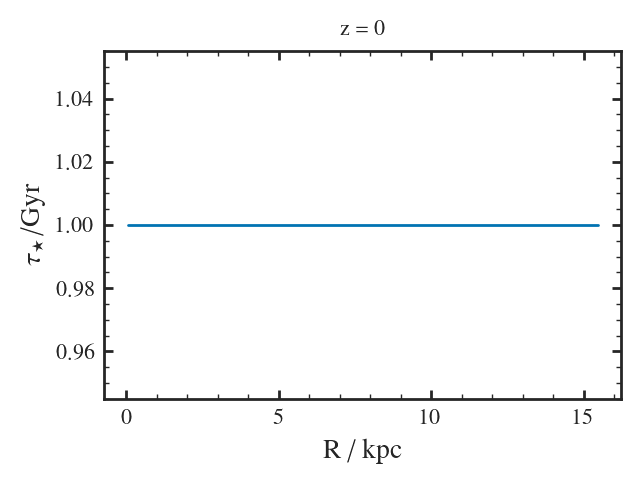

In [26]:
Σgas = h_end.mgas/A
yr_per_Gyr = 1e9
tau_star = h_end.mgas /(h_end.sfr * yr_per_Gyr)
plt.plot(h_end.R, tau_star)

plt.xlabel(r"R / kpc")
plt.ylabel(r"$\tau_\star\,$/Gyr")
plt.title("z = 0")


In [29]:
h_solar = h[h.R == 8.05]

Text(0, 0.5, 'tau star / Gyr')

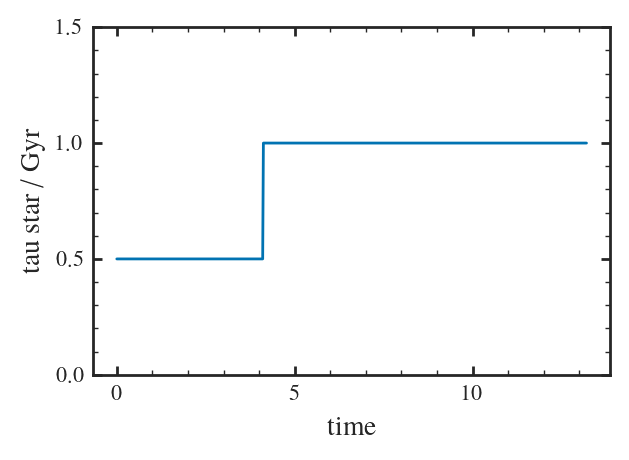

In [30]:
tau_star = h_solar.mgas /(h_solar.sfr * yr_per_Gyr)

plt.plot(h_solar.time, tau_star)
plt.ylim(0, 1.5)
plt.xlabel("time")
plt.ylabel("tau star / Gyr")

# Outflows and yields

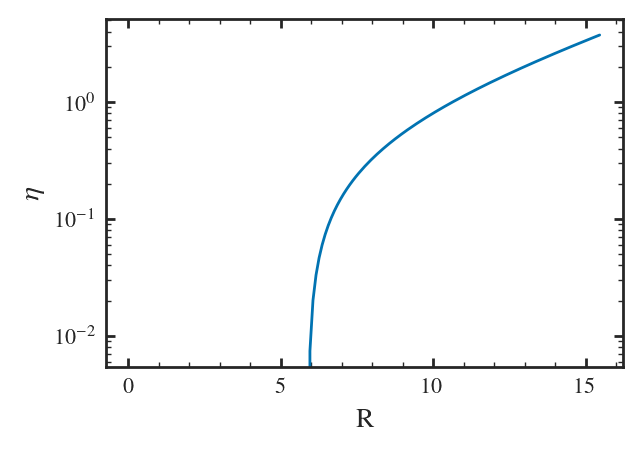

In [31]:
plt.plot(h_end.R, h_end.eta_0)
plt.xlabel("R")
plt.ylabel(r"$\eta$")
plt.yscale("log")

In [32]:
from surp.simulation.properties import MH_grad

Text(0, 0.5, '[M/H]')

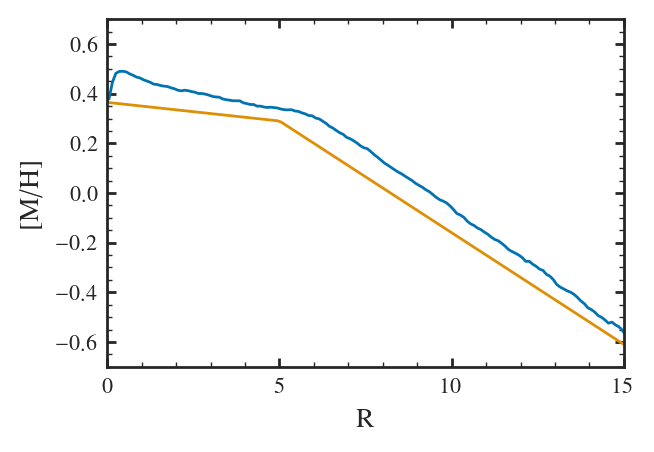

In [33]:
plt.plot(h_end.R, h_end.M_H)
y = MH_grad(params)(h_end.R)
plt.plot(h_end.R, y)

plt.xlim(0, 15)
plt.ylim(-0.7, 0.7)
plt.xlabel("R")
plt.ylabel(r"[M/H]")

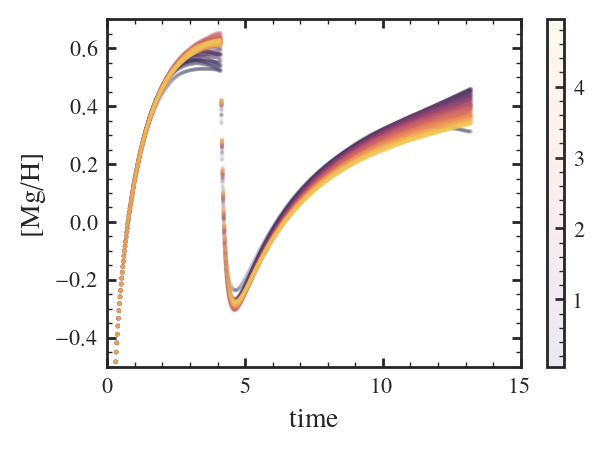

In [34]:
filt = h.R < 5
df = h[filt]
plt.scatter(df.time, df.MG_H, s=0.3, alpha=0.1, c=df.R)
plt.xlim(0, 15)
plt.ylim(-0.5, 0.7)
plt.xlabel("time")
plt.ylabel("[Mg/H]")
plt.colorbar()

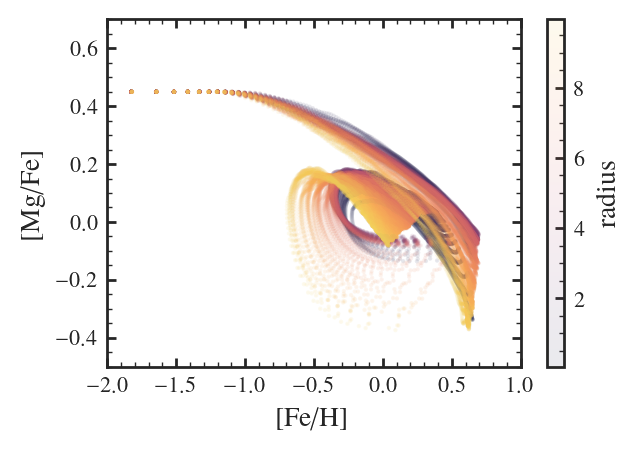

In [35]:
filt = h.R < 10
df = h[filt]
plt.scatter(df.FE_H, df.MG_FE, s=0.3, alpha=0.1, c=df.R)
plt.xlim(-2, 1)
plt.ylim(-0.5, 0.7)
plt.xlabel("[Fe/H]")
plt.ylabel("[Mg/Fe]")
plt.colorbar(label="radius")